In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import seaborn as sns
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.utils import resample
from sklearn.ensemble import RandomForestClassifier

In [2]:
airQ_data = pd.read_csv('../Datasets/AirQuality/AirQualityData_3/airquality-1998_2017.csv', low_memory =False)
len(airQ_data)
airQ_data.tail()

,id,city_name,state_name,Week,Year,avg_aqi
61771,61382,Long Beach,California,53,2017,127.333333
61772,61454,Anaheim,California,53,2017,116.000000
61773,61540,El Cajon,California,53,2017,92.000000
61774,61596,Chico,California,53,2017,95.000000
61775,61764,Yuba City,California,53,2017,82.000000


In [3]:
len(airQ_data)

61776

In [4]:
#Removing city and taking avg
airQ_data_mean = airQ_data.groupby(['state_name','Week','Year'])['avg_aqi'].mean().reset_index()
airQ_data_mean.head()

,state_name,Week,Year,avg_aqi
0,California,0,1999,92.500000
1,California,0,2000,75.437500
2,California,0,2001,87.254457
3,California,0,2002,61.261568
4,California,0,2003,55.143505


In [5]:
len(airQ_data_mean)

1011

In [6]:
#dropping 0 values
indexNames = airQ_data_mean[ (airQ_data_mean['avg_aqi'] == 0.000000)].index
airQ_data_mean.drop(indexNames , inplace=True)
airQ_data_mean.head()


,state_name,Week,Year,avg_aqi
0,California,0,1999,92.500000
1,California,0,2000,75.437500
2,California,0,2001,87.254457
3,California,0,2002,61.261568
4,California,0,2003,55.143505


In [7]:
len(airQ_data_mean)

1011

In [8]:
airQ_data_mean['Week'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53], dtype=int64)

In [9]:
#increasing week number by 1 to match influenza data
airQ_data_mean['Week'] = airQ_data_mean['Week']+1
airQ_data_mean['Week'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54], dtype=int64)

In [10]:
airQ_data_mean['Year'].unique()

array([1999, 2000, 2001, 2002, 2003, 2004, 2005, 2007, 2008, 2009, 2010,
       2011, 2013, 2014, 2015, 2016, 2006, 2012, 2017, 1998], dtype=int64)

In [11]:
airQ_data_mean

,state_name,Week,Year,avg_aqi
0,California,1,1999,92.500000
1,California,1,2000,75.437500
2,California,1,2001,87.254457
3,California,1,2002,61.261568
4,California,1,2003,55.143505
...,...,...,...,...
1006,California,53,2017,78.873386
1007,California,54,2000,130.863636
1008,California,54,2006,83.514493
1009,California,54,2012,63.000000


In [12]:
#we will use this influenza data
influenza_data = pd.read_csv('../Datasets/Disease cases/influenza/AgeViewByWeek_Influenza.csv', low_memory=False)
influenza_data.head()

,Year,Week,AgeGroup,A(H1),A(UnabletoSubtype),A(H3),A(H1N1)pdm09,A(SubtypingNotPerformed),B(VictoriaLineage),B(YamagataLineage),B(LineageUnspecified),H3N2v
0,2019,40,(0-4)yr,0,0,4,3,4,6,0,1,0
1,2019,41,(0-4)yr,0,0,2,5,3,15,0,0,0
2,2019,42,(0-4)yr,0,0,14,3,0,15,0,4,0
3,2019,43,(0-4)yr,0,0,4,4,0,12,0,3,0
4,2019,44,(0-4)yr,0,0,7,6,0,12,1,0,0


In [13]:
influenza_data['AgeGroup'].unique()

array(['(0-4)yr', '(5-24)yr', '(25-64)yr', '(65+)yr'], dtype=object)

In [14]:
influenza_data['Year'].unique()

array([2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010, 2009,
       2008, 2007, 2006, 2005, 2004, 2003, 2002, 2001, 2000, 1999, 1998,
       1997], dtype=int64)

In [15]:
#merging AQ data && influenza data

merged = pd.merge(airQ_data_mean,influenza_data,how='inner', left_on=['Year', 'Week'], right_on=['Year','Week'])

In [16]:
len(merged)

3944

In [17]:
merged

,state_name,Week,Year,avg_aqi,AgeGroup,A(H1),A(UnabletoSubtype),A(H3),A(H1N1)pdm09,A(SubtypingNotPerformed),B(VictoriaLineage),B(YamagataLineage),B(LineageUnspecified),H3N2v
0,California,1,1999,92.500000,(0-4)yr,0,0,7,0,1,0,0,7,0
1,California,1,1999,92.500000,(5-24)yr,0,0,14,0,5,0,0,15,0
2,California,1,1999,92.500000,(25-64)yr,0,0,29,0,5,0,0,12,0
3,California,1,1999,92.500000,(65+)yr,0,0,12,0,14,0,0,6,0
4,California,1,2000,75.437500,(0-4)yr,1,0,47,0,27,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3939,California,53,2009,54.811905,(65+)yr,0,1,0,61,4,0,0,0,0
3940,California,53,2014,53.122396,(0-4)yr,0,0,246,0,1,0,0,12,0
3941,California,53,2014,53.122396,(5-24)yr,0,0,347,0,6,0,0,21,0
3942,California,53,2014,53.122396,(25-64)yr,0,0,847,0,4,0,0,37,0


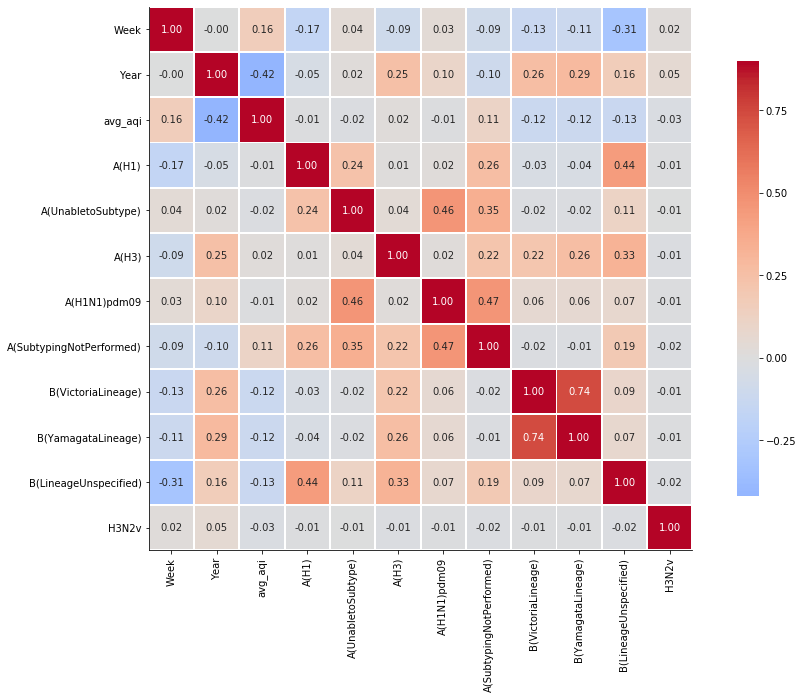

In [18]:
corr = merged.corr()
g = sns.heatmap(corr, vmax=.9, center=0,
               square=True, linewidths=.9, cbar_kws={"shrink": .8}, annot=True, fmt='.2f', cmap='coolwarm')
bottom, top = g.get_ylim()
g.set_ylim(bottom + 0.5, top - 0.5)
sns.despine()
g.figure.set_size_inches(16, 10)

In [19]:
merged_filtered = merged[merged['AgeGroup'] == '(25-64)yr']
influenza_data['AgeGroup'].unique()

array(['(0-4)yr', '(5-24)yr', '(25-64)yr', '(65+)yr'], dtype=object)

In [20]:
merged_filtered.head()

,state_name,Week,Year,avg_aqi,AgeGroup,A(H1),A(UnabletoSubtype),A(H3),A(H1N1)pdm09,A(SubtypingNotPerformed),B(VictoriaLineage),B(YamagataLineage),B(LineageUnspecified),H3N2v
2,California,1,1999,92.500000,(25-64)yr,0,0,29,0,5,0,0,12,0
6,California,1,2000,75.437500,(25-64)yr,0,0,132,0,80,0,0,0,0
10,California,1,2001,87.254457,(25-64)yr,36,0,1,0,6,0,0,31,0
14,California,1,2002,61.261568,(25-64)yr,0,0,33,0,7,0,0,1,0
18,California,1,2003,55.143505,(25-64)yr,13,0,4,0,1,0,0,6,0


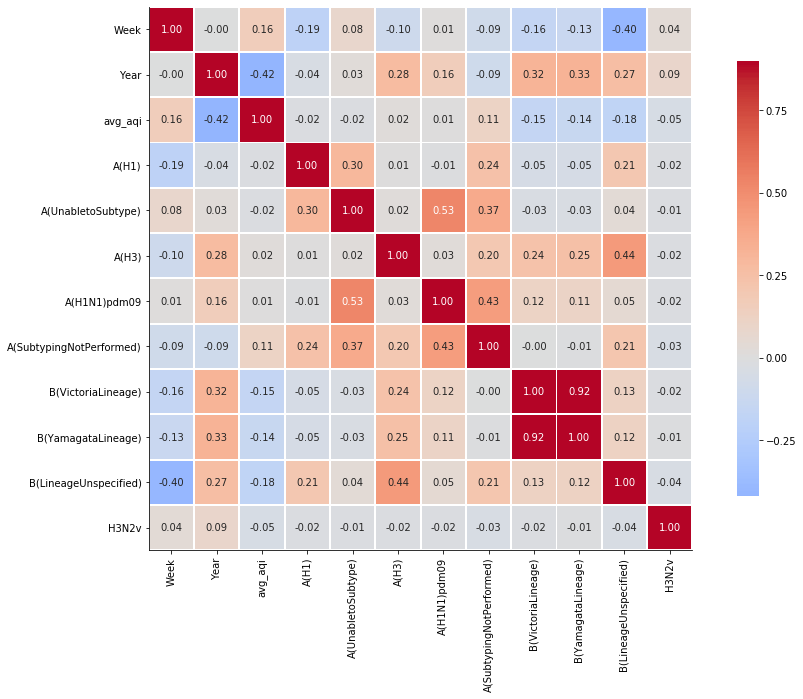

In [21]:
corr = merged_filtered.corr()
g = sns.heatmap(corr, vmax=.9, center=0,
               square=True, linewidths=.9, cbar_kws={"shrink": .8}, annot=True, fmt='.2f', cmap='coolwarm')
bottom, top = g.get_ylim()
g.set_ylim(bottom + 0.5, top - 0.5)
sns.despine()
g.figure.set_size_inches(16, 10)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text xticklabel objects>)

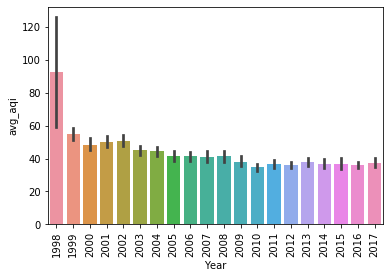

In [22]:
sns.barplot(x='Year', y='avg_aqi', data=merged_filtered, saturation=0.8)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text xticklabel objects>)

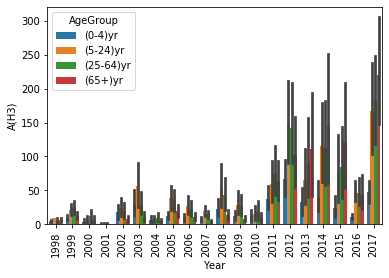

In [23]:
sns.barplot(x='Year', y='A(H3)', hue='AgeGroup', data=merged, saturation=0.8)
plt.xticks(rotation=90)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text xticklabel objects>)

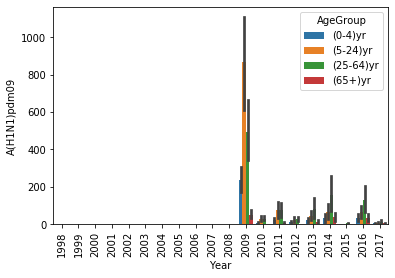

In [24]:
sns.barplot(x='Year', y='A(H1N1)pdm09', hue='AgeGroup', data=merged, saturation=0.8)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text xticklabel objects>)

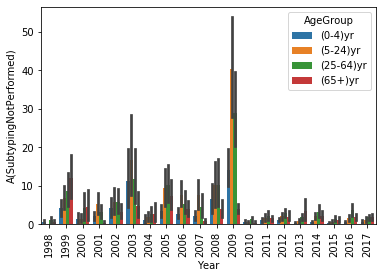

In [25]:
sns.barplot(x='Year', y='A(SubtypingNotPerformed)', hue='AgeGroup', data=merged, saturation=0.8)
plt.xticks(rotation=90)


In [26]:
merged

,state_name,Week,Year,avg_aqi,AgeGroup,A(H1),A(UnabletoSubtype),A(H3),A(H1N1)pdm09,A(SubtypingNotPerformed),B(VictoriaLineage),B(YamagataLineage),B(LineageUnspecified),H3N2v
0,California,1,1999,92.500000,(0-4)yr,0,0,7,0,1,0,0,7,0
1,California,1,1999,92.500000,(5-24)yr,0,0,14,0,5,0,0,15,0
2,California,1,1999,92.500000,(25-64)yr,0,0,29,0,5,0,0,12,0
3,California,1,1999,92.500000,(65+)yr,0,0,12,0,14,0,0,6,0
4,California,1,2000,75.437500,(0-4)yr,1,0,47,0,27,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3939,California,53,2009,54.811905,(65+)yr,0,1,0,61,4,0,0,0,0
3940,California,53,2014,53.122396,(0-4)yr,0,0,246,0,1,0,0,12,0
3941,California,53,2014,53.122396,(5-24)yr,0,0,347,0,6,0,0,21,0
3942,California,53,2014,53.122396,(25-64)yr,0,0,847,0,4,0,0,37,0


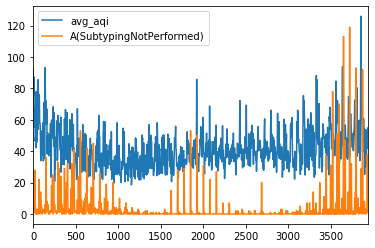

In [27]:
#plotting AQ index value vs. Virus
merged_filtered=merged[merged['AgeGroup'] == '(0-4)yr']
merged_filtered[['avg_aqi','A(SubtypingNotPerformed)']].plot()

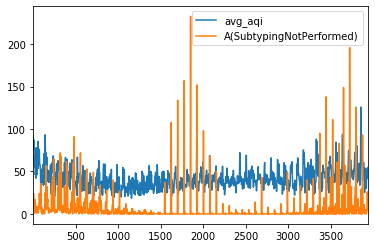

In [28]:
#plotting AQ index value vs. Virus
merged_filtered=merged[merged['AgeGroup'] == '(5-24)yr']
merged_filtered[['avg_aqi','A(SubtypingNotPerformed)']].plot()

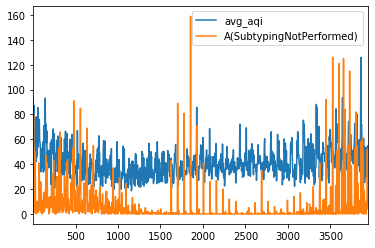

In [29]:
#plotting AQ index value vs. Virus
merged_filtered=merged[merged['AgeGroup'] == '(25-64)yr']
merged_filtered[['avg_aqi','A(SubtypingNotPerformed)']].plot()

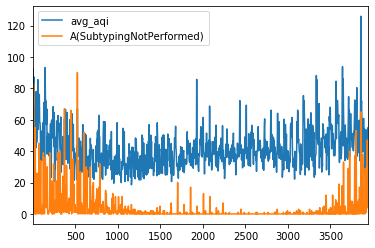

In [30]:
#plotting AQ index value vs. Virus vs age group
merged_filtered=merged[merged['AgeGroup'] == '(65+)yr']
merged_filtered[['avg_aqi','A(SubtypingNotPerformed)']].plot()

(array([1995. , 1997.5, 2000. , 2002.5, 2005. , 2007.5, 2010. , 2012.5,
        2015. , 2017.5, 2020. ]), <a list of 11 Text xticklabel objects>)

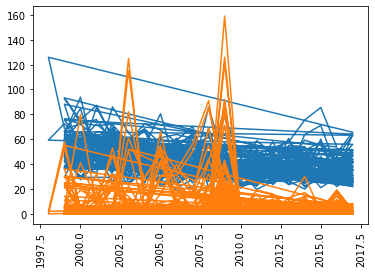

In [31]:
plt.figure()

merged_filtered=merged[merged['AgeGroup'] == '(25-64)yr']


x = merged_filtered['Year']
y1 = merged_filtered['avg_aqi'] 
y2 = merged_filtered['A(SubtypingNotPerformed)']


plt.plot(x,y1)
plt.plot(x,y2)
plt.xticks(rotation=90)

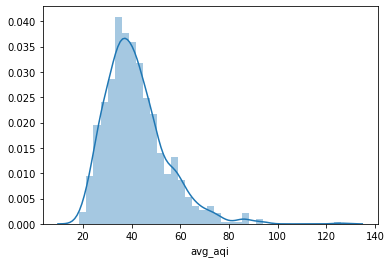

In [32]:
sns.distplot(merged_filtered['avg_aqi'])
plt.show()

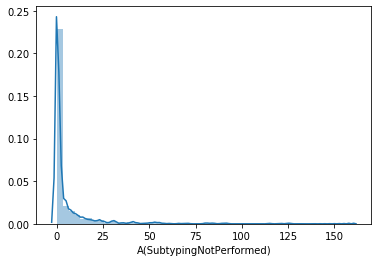

In [33]:
sns.distplot(merged_filtered['A(SubtypingNotPerformed)'])
plt.show()

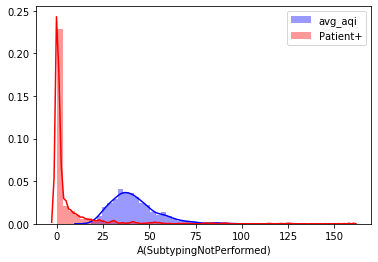

In [34]:
# Method 1: on the same Axis
sns.distplot( (merged_filtered["avg_aqi"]) , color="blue", label="avg_aqi")
sns.distplot( merged_filtered["A(SubtypingNotPerformed)"] , color="red", label="Patient+")
plt.legend()
 
plt.show()


In [35]:
merged.head()

,state_name,Week,Year,avg_aqi,AgeGroup,A(H1),A(UnabletoSubtype),A(H3),A(H1N1)pdm09,A(SubtypingNotPerformed),B(VictoriaLineage),B(YamagataLineage),B(LineageUnspecified),H3N2v
0,California,1,1999,92.5000,(0-4)yr,0,0,7,0,1,0,0,7,0
1,California,1,1999,92.5000,(5-24)yr,0,0,14,0,5,0,0,15,0
2,California,1,1999,92.5000,(25-64)yr,0,0,29,0,5,0,0,12,0
3,California,1,1999,92.5000,(65+)yr,0,0,12,0,14,0,0,6,0
4,California,1,2000,75.4375,(0-4)yr,1,0,47,0,27,0,0,0,0


In [36]:
# Prep Training and Test data -from combined age group
trainData, testData = train_test_split(merged, train_size=0.7, random_state=100)

In [37]:
merged.columns

Index(['state_name', 'Week', 'Year', 'avg_aqi', 'AgeGroup', 'A(H1)',
       'A(UnabletoSubtype)', 'A(H3)', 'A(H1N1)pdm09',
       'A(SubtypingNotPerformed)', 'B(VictoriaLineage)', 'B(YamagataLineage)',
       'B(LineageUnspecified)', 'H3N2v'],
      dtype='object')

In [38]:
#X and Y(target) for random forest
Y_trainData = trainData[['A(SubtypingNotPerformed)']]
X_trainData= trainData.drop(['state_name','AgeGroup','A(SubtypingNotPerformed)'], axis =1 )
X_trainData.head()

,Week,Year,avg_aqi,A(H1),A(UnabletoSubtype),A(H3),A(H1N1)pdm09,B(VictoriaLineage),B(YamagataLineage),B(LineageUnspecified),H3N2v
3029,41,1999,55.768203,0,0,2,0,0,0,0,0
2738,37,2002,43.712812,0,0,0,0,0,0,0,0
3273,44,2003,51.679187,0,0,53,0,0,0,0,0
2758,37,2007,36.955062,2,0,1,0,0,0,0,0
2532,34,2008,31.039425,0,0,0,0,0,0,0,0


In [39]:
#test data
Y_testData = testData[['A(SubtypingNotPerformed)']]
X_testData= testData.drop(['state_name','AgeGroup','A(SubtypingNotPerformed)'], axis =1 )


In [40]:
#Create Random Forest
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_trainData,Y_trainData)

y_pred=clf.predict(X_testData)

c:\users\subar\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


In [41]:
Y_testData, y_pred

(      A(SubtypingNotPerformed)
 2026                         0
 726                         15
 1902                         0
 3237                         0
 3718                        16
 ...                        ...
 949                          0
 3308                         0
 3257                         1
 2305                         0
 442                          5
 
 [1184 rows x 1 columns], array([ 0, 15,  0, ...,  0,  0,  2], dtype=int64))

In [42]:
# for combined age
accuracy_score(Y_testData,y_pred)*100

57.26351351351351

In [ ]:
#Random Forest - for individual age group '(0-4)yr', '(5-24)yr', '(25-64)yr', '(65+)yr'

In [54]:
# 1. 
#for individual age group:(0-4)yr -Random Forest
merged_filtered=merged[merged['AgeGroup'] == '(0-4)yr']
trainData, testData = train_test_split(merged_filtered, train_size=0.7, random_state=100)

In [55]:
#X and Y(target) for Random Forest-individual age group 
Y_trainData = trainData[['A(SubtypingNotPerformed)']]
X_trainData= trainData.drop(['state_name','AgeGroup','A(SubtypingNotPerformed)'], axis =1 )
X_trainData.head()

#test data
Y_testData = testData[['A(SubtypingNotPerformed)']]
X_testData= testData.drop(['state_name','AgeGroup','A(SubtypingNotPerformed)'], axis =1 )

In [56]:
# Creating Random Forest model--individual age group

clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_trainData,Y_trainData)
y_pred=clf.predict(X_testData)

# Random Forest - --individual age group
accuracy_score(Y_testData,y_pred)*100

c:\users\subar\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


61.82432432432432

In [57]:
#2
#for individual age group:(5-24)yr -Random Forest
merged_filtered=merged[merged['AgeGroup'] == '(5-24)yr']
trainData, testData = train_test_split(merged_filtered, train_size=0.7, random_state=100)

In [58]:
#X and Y(target) for Random Forest-individual age group 
Y_trainData = trainData[['A(SubtypingNotPerformed)']]
X_trainData= trainData.drop(['state_name','AgeGroup','A(SubtypingNotPerformed)'], axis =1 )
X_trainData.head()

#test data
Y_testData = testData[['A(SubtypingNotPerformed)']]
X_testData= testData.drop(['state_name','AgeGroup','A(SubtypingNotPerformed)'], axis =1 )

In [59]:
# Creating Random Forest model--individual age group

clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_trainData,Y_trainData)
y_pred=clf.predict(X_testData)

# Random Forest - --individual age group
accuracy_score(Y_testData,y_pred)*100

c:\users\subar\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


54.054054054054056

In [60]:
#3
#for individual age group -Random Forest
merged_filtered=merged[merged['AgeGroup'] == '(25-64)yr']
trainData, testData = train_test_split(merged_filtered, train_size=0.7, random_state=100)

In [61]:
#X and Y(target) for Random Forest-individual age group 
Y_trainData = trainData[['A(SubtypingNotPerformed)']]
X_trainData= trainData.drop(['state_name','AgeGroup','A(SubtypingNotPerformed)'], axis =1 )
X_trainData.head()

#test data
Y_testData = testData[['A(SubtypingNotPerformed)']]
X_testData= testData.drop(['state_name','AgeGroup','A(SubtypingNotPerformed)'], axis =1 )

In [62]:
# Creating Random Forest model--individual age group

clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_trainData,Y_trainData)
y_pred=clf.predict(X_testData)

# Random Forest - --individual age group
accuracy_score(Y_testData,y_pred)*100

c:\users\subar\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


48.986486486486484

In [63]:
#4
#for individual age group:(65+)yr -Random Forest
merged_filtered=merged[merged['AgeGroup'] == '(65+)yr']
trainData, testData = train_test_split(merged_filtered, train_size=0.7, random_state=100)

In [64]:
#X and Y(target) for Random Forest-individual age group 
Y_trainData = trainData[['A(SubtypingNotPerformed)']]
X_trainData= trainData.drop(['state_name','AgeGroup','A(SubtypingNotPerformed)'], axis =1 )
X_trainData.head()

#test data
Y_testData = testData[['A(SubtypingNotPerformed)']]
X_testData= testData.drop(['state_name','AgeGroup','A(SubtypingNotPerformed)'], axis =1 )

In [65]:
# Creating Random Forest model--individual age group

clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_trainData,Y_trainData)
y_pred=clf.predict(X_testData)

# Random Forest - --individual age group
accuracy_score(Y_testData,y_pred)*100

c:\users\subar\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


60.13513513513513

## Below code is reference from 

https://github.com/kidaufo/StatisticalModeling/blob/master/GLM.ipynb
https://towardsdatascience.com/generalized-linear-models-9cbf848bb8ab

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:                            GLM   Df Residuals:                       98
Model Family:                 Poisson   Df Model:                            1
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -213.95
Date:                Fri, 22 Nov 2019   Deviance:                       120.86
Time:                        08:23:13   Pearson chi2:                     115.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2789      0.162     -1.720      0.085      -0.597       0.039
x1             0.5646      0.042     13.508      0.000       0.483       0.647
==============================================================================
"""

Text(0, 0.5, 'Y')

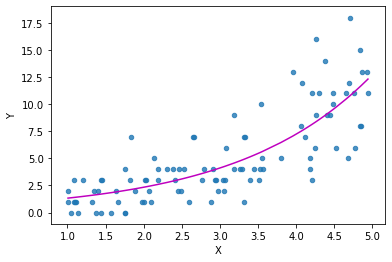

In [139]:
# Poisson regression code

import statsmodels.api as sm
np.random.seed(5)
n_sample = 100
a = 0.6
b = -0.4

x = uniform(1, 5, size=n_sample)
mu = np.exp(a * x + b)
y = poisson(mu)

exog, endog = sm.add_constant(x), y

# Poisson regression
mod = sm.GLM(endog, exog, family=sm.families.Poisson(link=sm.families.links.log()))
res = mod.fit()
display(res.summary())

y_pred = res.predict(exog)

idx = x.argsort()
x_ord, y_pred_ord = x[idx], y_pred[idx]
plt.plot(x_ord, y_pred_ord, color='m')
plt.scatter(x, y,  s=20, alpha=0.8)
plt.xlabel("X")
plt.ylabel("Y")

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:                            GLM   Df Residuals:                       98
Model Family:                Gaussian   Df Model:                            1
Link Function:                    log   Scale:                          6.1765
Method:                          IRLS   Log-Likelihood:                -231.93
Date:                Fri, 22 Nov 2019   Deviance:                       605.30
Time:                        08:25:54   Pearson chi2:                     605.
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2369      0.224     -1.059      0.290      -0.675       0.202
x1             0.5541      0.052     10.583      0.000       0.451       0.657
==============================================================================
"""

Text(0, 0.5, 'Y')

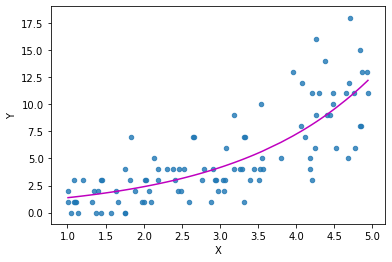

In [140]:
# Normal distribution + log link function
from numpy.random import uniform, normal, poisson, binomial


np.random.seed(5)
n_sample = 100
a = 0.6
b = -0.4

x = uniform(1, 5, size=n_sample)
mu = np.exp(a * x + b)
y = poisson(mu)
exog, endog = sm.add_constant(x), y


mod = sm.GLM(endog, exog, family=sm.families.Gaussian(sm.families.links.log()))
res = mod.fit()
display(res.summary())

y_pred = res.predict(exog)

idx = x.argsort()
x_ord, y_pred_ord = x[idx], y_pred[idx]

plt.plot(x_ord, y_pred_ord, color='m')
plt.scatter(x, y,  s=20, alpha=0.8)
plt.xlabel("X")
plt.ylabel("Y")

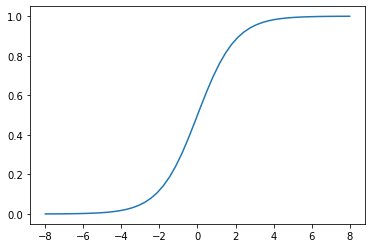

In [129]:
def logistic(x):
    return 1 / (1 + np.exp(-x))


xx = np.linspace(-8, 8)
plt.plot(xx, logistic(xx))

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:                            GLM   Df Residuals:                       98
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -31.508
Date:                Fri, 22 Nov 2019   Deviance:                       63.016
Time:                        08:19:27   Pearson chi2:                     109.
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -7.0444      1.385     -5.087      0.000      -9.758      -4.330
x1             2.4211      0.465      5.207      0.000       1.510       3.332
==============================================================================
"""

Text(0, 0.5, 'Y')

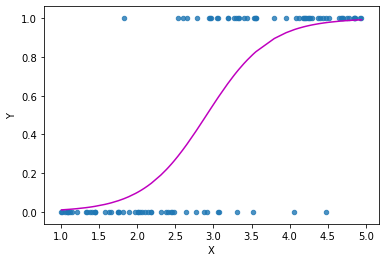

In [133]:
#logistic regression


np.random.seed(5)
n_sample = 100
a = 3.0
b = -9.0

x = uniform(1, 5, size=n_sample)
x = np.sort(x)

q = logistic(a * x + b)
y = binomial(n=1, p=q)

exog, endog = sm.add_constant(X_train), y_train

# Logistic regression
mod = sm.GLM(endog, exog, family=sm.families.Binomial(link=sm.families.links.logit()))
res = mod.fit()
display(res.summary())

y_pred = res.predict(exog)

idx = x.argsort()
x_ord, y_pred_ord = x[idx], y_pred[idx]
plt.plot(x_ord, y_pred_ord, color='m')
plt.scatter(x, y,  s=20, alpha=0.8)
plt.xlabel("X")
plt.ylabel("Y")
# plt.savefig('logistic_regression.png')

In [134]:
np.random.seed(5)
n_sample = 100
a = 0.6
b = -0.4
sd = 0.8

x = uniform(1, 5, size=n_sample)
mu = np.exp(a * x + b)
y = normal(mu, sd)

Text(0, 0.5, 'Y')

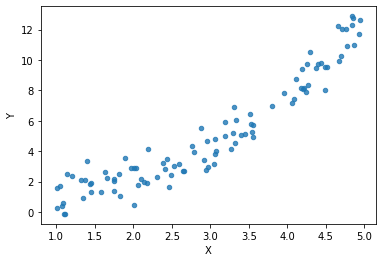

In [135]:
plt.scatter(x, y,  s=20, alpha=0.8)
plt.xlabel("X")
plt.ylabel("Y")
# plt.savefig('custom_GLM_data.png')

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:                            GLM   Df Residuals:                       98
Model Family:                Gaussian   Df Model:                            1
Link Function:                    log   Scale:                         0.69261
Method:                          IRLS   Log-Likelihood:                -122.53
Date:                Fri, 22 Nov 2019   Deviance:                       67.876
Time:                        08:20:36   Pearson chi2:                     67.9
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3115      0.075     -4.130      0.000      -0.459      -0.164
x1             0.5789      0.018     32.984      0.000       0.545       0.613
==============================================================================
"""

Text(0, 0.5, 'Y')

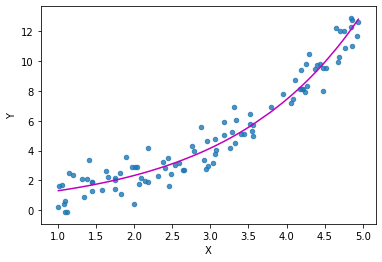

In [136]:
exog = sm.add_constant(x)
endog = y

# Normal distribution + log link function
mod = sm.GLM(endog, exog, family=sm.families.Gaussian(sm.families.links.log()))
res = mod.fit()
display(res.summary())

y_pred = res.predict(exog)

idx = x.argsort()
x_ord, y_pred_ord = x[idx], y_pred[idx]

plt.plot(x_ord, y_pred_ord, color='m')
plt.scatter(x, y,  s=20, alpha=0.8)
plt.xlabel("X")
plt.ylabel("Y")